In [15]:
import numpy as np
import pandas as pd

In [16]:
data = pd.read_csv('winequalityN.csv')

In [17]:
data.head()
data = data.sample(1000)

In [18]:
data.dropna(inplace=True)
data.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
len(data)

995

# One hot encoding 

In [20]:
data.nunique()

type                      2
fixed acidity            80
volatile acidity        110
citric acid              76
residual sugar          200
chlorides               116
free sulfur dioxide      87
total sulfur dioxide    227
density                 473
pH                       84
sulphates                75
alcohol                  70
quality                   7
dtype: int64

In [21]:
# Define a dictionary for the target mapping
target_map = {'white':1, 'red':0}
# Use the pandas apply method to numerically encode our attrition target variable
data["type"] = data["type"].apply(lambda x: target_map[x])

In [22]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1164,1,8.2,0.230,0.49,0.9,0.057,15.0,73.0,0.99280,3.07,0.38,10.4,6
5428,0,9.1,0.220,0.24,2.1,0.078,1.0,28.0,0.99900,3.41,0.87,10.3,6
4130,1,6.8,0.290,0.32,1.8,0.032,18.0,130.0,0.99095,3.05,0.62,11.2,6
5940,0,8.9,0.500,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1,6
3601,1,6.6,0.295,0.24,1.6,0.039,29.0,140.0,0.99304,3.35,0.61,10.4,7


# K Means Clustering

In [23]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [24]:
# Do minmax scaling
# min_max_scaler = MinMaxScaler()
data_columns = data.columns

In [27]:
data
data.to_csv("original_data.csv", index=False)

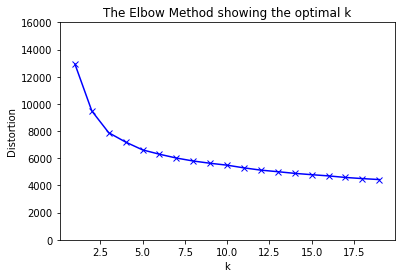

In [28]:
# create new plot and data
plt.plot()
X = np.array(scale(data))
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylim(0,16000)
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [92]:
kmeanModel = KMeans(n_clusters=5).fit(X)
kmeanModel.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [93]:
# Add cluster to the df
data['cluster'] = kmeanModel.fit_predict(X)

In [94]:
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cluster
3867,1,7.3,0.25,0.26,7.2,0.048,52.0,207.0,0.99587,3.12,0.37,9.2,5,3
6063,0,8.5,0.44,0.50,1.9,0.369,15.0,38.0,0.99634,3.01,1.10,9.4,5,1
1086,1,5.2,0.24,0.45,3.8,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8,0
718,1,6.2,0.21,0.27,1.7,0.038,41.0,150.0,0.99330,3.49,0.71,10.5,7,0
1282,1,7.4,0.31,0.74,10.7,0.039,51.0,147.0,0.99770,3.02,0.43,8.7,5,3


# Random Sampling

In [95]:
random_sample = data.sample(frac=0.25)

In [96]:
len(random_sample), len(random_sample.columns)

(249, 14)

In [97]:
random_sample.drop(['cluster'], axis=1, inplace=True)

In [98]:
random_sample.to_csv("random_sample.csv", index=False)

# Save the clustered sample

In [99]:
cluster_sample = data

In [100]:
cluster_sample = cluster_sample.groupby('cluster').apply(lambda x: x.sample(frac=0.25))

In [101]:
cluster_sample.drop(['cluster'], axis=1, inplace=True)
cluster_sample = cluster_sample.reset_index()
cluster_sample.drop(['cluster', 'level_1'], axis=1, inplace=True)

In [102]:
len(cluster_sample), cluster_sample.shape
# cluster_sample.head()

(248, (248, 13))

In [103]:
cluster_sample.to_csv("cluster_sample.csv", index=False)

# Insert Original Sample

In [39]:
data.drop(['cluster'], axis = 1, inplace=True)

In [40]:
data.to_csv("original_sample.csv", index=False)

# PCA

In [41]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [42]:
def do_pca(data, n_components):
    my_model = PCA()
    my_model.fit_transform(StandardScaler().fit_transform(data))
    print(my_model.explained_variance_)
    print(my_model.explained_variance_ratio_)
    print(my_model.explained_variance_ratio_.cumsum())
    return my_model

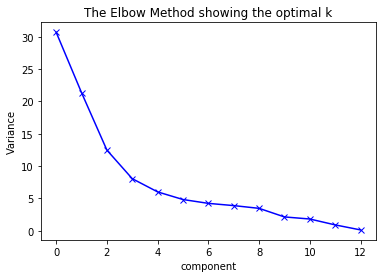

In [43]:
data = pd.read_csv("original_sample.csv")
my_model = PCA()
my_model.fit_transform(StandardScaler().fit_transform(data))
y = my_model.explained_variance_ratio_ * 100

# Plot the elbow
plt.plot([i for i in range(0, len(data.columns))], y, 'bx-')
plt.xlabel('component')
plt.ylabel('Variance')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [44]:
data = pd.read_csv("cluster_sample.csv")
# do_pca(data, len(data.columns))
pca = do_pca(data, 10)

[4.31165125 2.76538045 1.66778771 1.13539787 0.73076621 0.59692114
 0.46298553 0.44291963 0.39197411 0.24781731 0.21537999 0.09800336
 0.01426542]
[0.32960545 0.21140032 0.12749452 0.08679582 0.05586364 0.04563181
 0.03539306 0.03385912 0.02996458 0.01894447 0.01646479 0.0074919
 0.00109052]
[0.32960545 0.54100577 0.66850029 0.75529611 0.81115975 0.85679156
 0.89218463 0.92604375 0.95600833 0.97495279 0.99141758 0.99890948
 1.        ]


In [45]:
# PCA loadings
mymodel = PCA(n_components=4)
pca_loadings = mymodel.fit(data)
pca_results = mymodel.explained_variance_ratio_
loadings = np.sum(np.square(mymodel.components_), axis = 0, dtype=np.float32)
print(np.square(mymodel.components_), loadings)
print(data.columns[[loadings.argsort()[-3:][::-1]]])
print()

[[3.33871495e-05 8.36897572e-05 2.09832852e-06 2.77383543e-07
  2.40740949e-03 4.01013271e-08 4.62431135e-02 9.51209956e-01
  1.16140127e-12 3.17596165e-07 6.00902730e-07 1.70256032e-05
  2.08466274e-06]
 [7.98929577e-07 1.22142497e-04 1.85455367e-06 9.86151556e-07
  4.73401077e-03 8.75113880e-08 9.49735220e-01 4.47092732e-02
  3.55450121e-09 6.20836432e-06 2.38088990e-06 4.40405775e-04
  2.46627468e-04]
 [6.60447137e-05 2.55187775e-03 8.77870828e-06 3.33324304e-06
  9.79394973e-01 6.90600710e-07 3.52954796e-03 3.93628929e-03
  2.23985873e-07 2.79787703e-04 1.84826412e-06 9.46331783e-03
  7.63287192e-04]
 [8.96825907e-03 5.38797814e-01 7.55485746e-04 9.00771865e-04
  1.09315031e-02 4.67180030e-05 4.05272162e-04 4.14997523e-05
  1.83908924e-06 7.90228196e-04 1.00613267e-04 3.13010615e-01
  1.25249380e-01]] [9.0684900e-03 5.4155552e-01 7.6821732e-04 9.0536865e-04 9.9746788e-01
 4.7536218e-05 9.9991316e-01 9.9989700e-01 2.0666307e-06 1.0765418e-03
 1.0544332e-04 3.2293135e-01 1.2626138e-0

/Users/krishshanmukh/Desktop/SBU/Visualization/Lab2/venv/lib/python3.7/site-packages/pandas/core/indexes/base.py:3941: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = getitem(key)


In [46]:
def pca(data):
    my_model = PCA(n_components=2)
    X_pca=my_model.fit_transform(StandardScaler().fit_transform(data)) 
    Xax=X_pca[:,0]
    Yax=X_pca[:,1]
    fig,ax=plt.subplots(figsize=(7,5))
    fig.patch.set_facecolor('white')
    ax.scatter(Xax,Yax)# for loop endsplt.xlabel("First Principal Component",fontsize=14)
    plt.ylabel("Second Principal Component",fontsize=14)
    plt.xlabel("First Principal Component",fontsize=14)
    plt.legend()
    plt.show()# please check the scatter plot of the remaining component and you will understand the difference

No handles with labels found to put in legend.


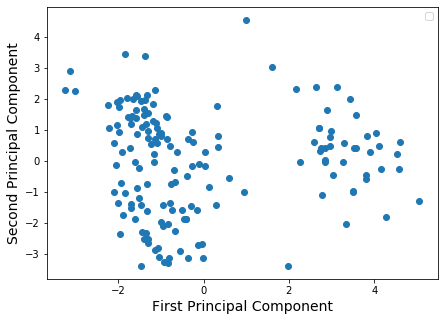

In [47]:
data = pd.read_csv("cluster_sample.csv")
# data.drop(["cluster.1"], axis=1, inplace=True)
data.head()

my_model = PCA(n_components=2)
X_pca=my_model.fit_transform(StandardScaler().fit_transform(data)) 
Xax=X_pca[:,0]
Yax=X_pca[:,1]
fig,ax=plt.subplots(figsize=(7,5))
# fig.patch.set_facecolor('white')
targets = [i for i in range(0,9)]
colors = ['r', 'b', 'g', 'orange', 'black', 'pink', 'violet', 'indigo', 'yellow']
# for target, color in zip(targets,colors):
#     indicesToKeep = data['cluster'] == target
#     ax.scatter(Xax[indicesToKeep]
#                , Yax[indicesToKeep]
#                , c = color
#                , s = 50)
ax.scatter(Xax,Yax)# for loop endsplt.xlabel("First Principal Component",fontsize=14)
plt.ylabel("Second Principal Component",fontsize=14)
plt.xlabel("First Principal Component",fontsize=14)
plt.legend()
plt.show()# plea

# do_pca(data, len(data.columns))
# pca(data)

No handles with labels found to put in legend.


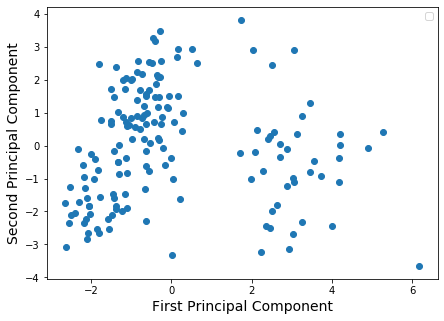

In [48]:
data = pd.read_csv("random_sample.csv")
# do_pca(data, len(data.columns))
pca(data)

No handles with labels found to put in legend.


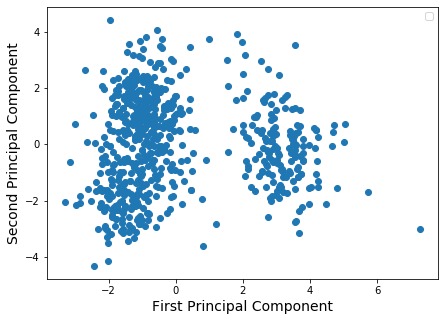

In [49]:
data = pd.read_csv("original_sample.csv")
# do_pca(data, len(data.columns))
pca(data)